# Trying pre-trained model on (sort of) real life German Speed Limit Signs

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pylab as plt
# https://docs.scipy.org/doc/numpy/reference/routines.math.html
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.2'

In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

assert StrictVersion(tf.__version__) >= StrictVersion('1.2.0')

tf.__version__

'1.2.1'

In [7]:
import keras as keras

# should at least be 1.2 and use TensorFlow backend
assert StrictVersion(keras.__version__) >= StrictVersion('1.2.2')

keras.__version__

Using TensorFlow backend.


'2.0.4'

## Download data

In [10]:
# https://notebooks.azure.com/faq#service_restrictions
# https://notebooks.azure.com/faq#upload_data
# https://notebooks.azure.com/n/xwZx1vmIroU/notebooks/Getting%20to%20your%20Data%20in%20Azure%20Notebooks.ipynb

In [11]:
# !curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/real-world.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1203k  100 1203k    0     0  2767k      0 --:--:-- --:--:-- --:--:-- 2767k


In [12]:
# !rm -r real-world

rm: cannot remove 'real-world': No such file or directory


In [13]:
# https://docs.python.org/3/library/zipfile.html
# from zipfile import ZipFile
# zip = ZipFile(r'real-world.zip')
# zip.extractall('.')

In [14]:
# !ls -l real-world

total 24
drwxr-xr-x 2 nbuser nbuser 4096 Apr 27 10:07 0
drwxr-xr-x 2 nbuser nbuser 4096 Apr 27 10:07 1
drwxr-xr-x 2 nbuser nbuser 4096 Apr 27 10:07 2
drwxr-xr-x 2 nbuser nbuser 4096 Apr 27 10:07 3
drwxr-xr-x 2 nbuser nbuser 4096 Apr 27 10:07 4
drwxr-xr-x 2 nbuser nbuser 4096 Apr 27 10:07 5


In [8]:
import os
import skimage.data
import skimage.transform

def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    all_file_names = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir)]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
            all_file_names.append(f)
    # Resize images
    images64 = [skimage.transform.resize(image, (64, 64))
                for image in images]
    return images64, labels, all_file_names

In [ ]:
# Load datasets.
ROOT_PATH = "../data"
data_dir = os.path.join(ROOT_PATH, "real-world")

images, labels, file_names = load_data(data_dir)

In [10]:
len(images)

17

In [11]:
len(labels)

17

In [12]:
labels

[0, 0, 0, 0, 1, 1, 1, 1000, 1000, 1001, 2, 3, 3, 4, 4, 5, 5]

In [13]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    plt.figure(figsize=(15, 15))
    i = 0
    for label in labels:
        # Pick the first image for each label.
        image = images[i]
        plt.subplot(5, 5, i + 1)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("{0}".format(label))
        i += 1
        plt.imshow(image)
    plt.show()

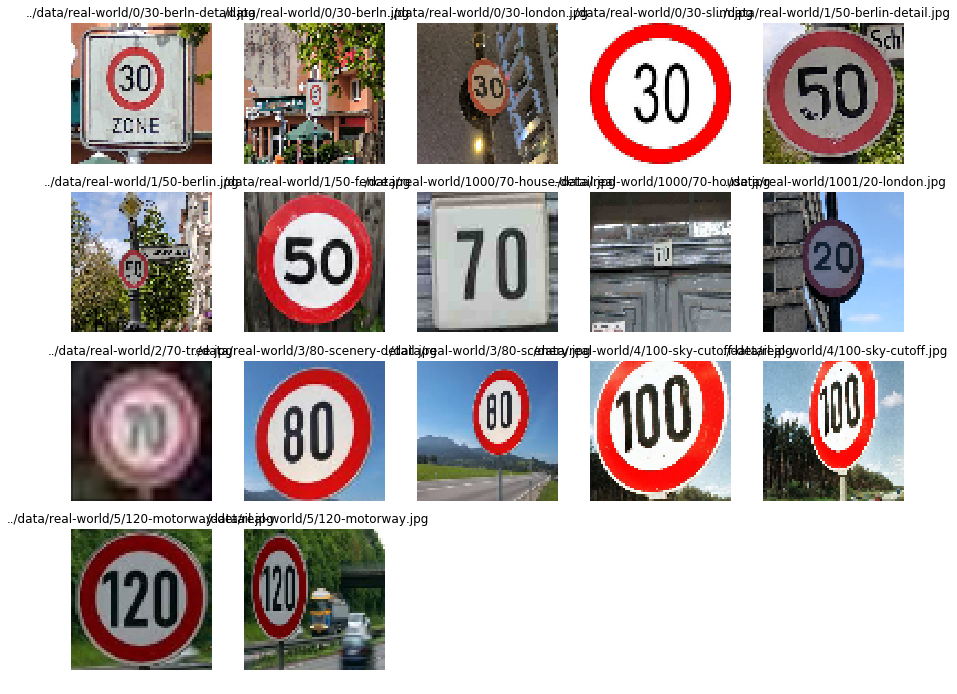

In [14]:
display_images_and_labels(images, file_names)

## Load model

In [15]:
from keras.models import load_model

In [16]:
# !curl -O https://transfer.sh/xjzxH/conv-vgg.h5
# !curl -O https://transfer.sh/tntFr/conv-vgg.h5

In [17]:
# !curl -O https://transfer.sh/C36DS/conv-inception.h5

In [18]:
# !curl -O https://transfer.sh/ldleM/conv-residual.h5

In [19]:
# !ls -l

In [20]:
model = load_model('./models/conv-vgg-augmented.h5')

In [ ]:
# model = load_model('conv-inception.h5')

In [ ]:
# model is tiny, no final fc layer
# model = load_model('conv-residual.h5')

In [22]:
import skimage.transform
def predict_single(image):
    # normalize
    X_sample = np.array([image])
    prediction = model.predict(X_sample)
    predicted_category = np.argmax(prediction, axis=1)
    return predicted_category, prediction

In [23]:
# Display the predictions and the ground truth visually.
def display_prediction (images, true_labels, predicted_labels):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(true_labels)):
        truth = true_labels[i]
        prediction = predicted_labels[i]
        plt.subplot(6, 3,1+i)
        plt.axis('off')
        color='green' if truth == prediction else 'red'
        plt.text(80, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
                 fontsize=12, color=color)
        plt.imshow(images[i])

## Make Predictions

In [24]:
X_sample = np.array(images)
prediction = model.predict(X_sample)
prediction

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],


In [25]:
predicted_categories = np.argmax(prediction, axis=1)
predicted_categories

array([0, 0, 0, 3, 3, 0, 3, 0, 0, 1, 3, 3, 2, 3, 2, 3, 1])

In [26]:
ground_truth = np.array(labels)
ground_truth

array([   0,    0,    0,    0,    1,    1,    1, 1000, 1000, 1001,    2,
          3,    3,    4,    4,    5,    5])

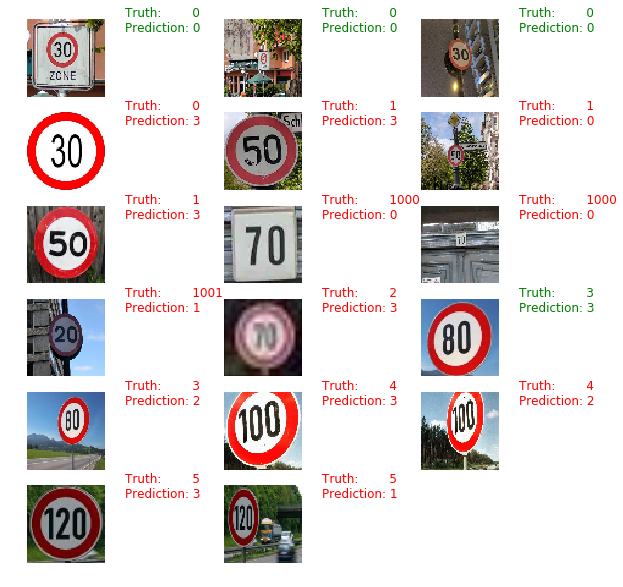

In [28]:
display_prediction(images, ground_truth, predicted_categories)

## Using Quiver to inspect how activations look like, you see a complete overfit on ideal images
https://github.com/keplr-io/quiver

In [32]:
# create a tmp dir in the local directory this notebook runs in, otherwise quiver will fail (and won't tell you why)

# change image_class to feed in different classes
image_class = '1'

# https://github.com/keplr-io/quiver
from quiver_engine import server
server.launch(model, input_folder=data_dir+'/'+image_class, port=7000)

# open at http://localhost:7000/
# interrupt kernel to return control to notebook

Starting webserver from: /home/olli/anaconda3/lib/python3.6/site-packages/quiver_engine


::1 - - [2017-07-19 10:21:58] "GET / HTTP/1.1" 200 829 0.010450
::1 - - [2017-07-19 10:21:58] "GET /app.c1d3d21cfba8c1aabed6806773c8f0ba.css HTTP/1.1" 200 5158 0.004067
::1 - - [2017-07-19 10:21:58] "GET /app.14b8092d6ea379715007.js HTTP/1.1" 200 1179498 0.085046
::1 - - [2017-07-19 10:21:58] "GET /vendor.280c5ce1d78077ee8d66.js HTTP/1.1" 200 87583 0.009134
::1 - - [2017-07-19 10:21:59] "GET /model HTTP/1.1" 200 11756 0.010080
::1 - - [2017-07-19 10:21:59] "GET /inputs HTTP/1.1" 200 208 0.001741
::1 - - [2017-07-19 10:21:59] "GET /favicon.ico HTTP/1.1" 200 16207 0.004342
::1 - - [2017-07-19 10:21:59] "GET /input-file/50-berlin-detail.jpg HTTP/1.1" 200 55458 0.010866
::1 - - [2017-07-19 10:21:59] "GET /input-file/50-fence.jpg HTTP/1.1" 200 4531 0.007621
::1 - - [2017-07-19 10:21:59] "GET /input-file/50-berlin.jpg HTTP/1.1" 200 504384 0.012833
[2017-07-19 10:22:04,148] ERROR in app: Exception on /predict/50-berlin-detail.jpg [GET]
Traceback (most recent call last):
  File "/home/olli/ana

::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_5_50-berlin-detail.jpg.png HTTP/1.1" 200 1183 0.015366
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_7_50-berlin-detail.jpg.png HTTP/1.1" 200 998 0.009681
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_22_50-berlin-detail.jpg.png HTTP/1.1" 200 1148 0.013617
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_21_50-berlin-detail.jpg.png HTTP/1.1" 200 985 0.016450
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_28_50-berlin-detail.jpg.png HTTP/1.1" 200 993 0.014230
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_19_50-berlin-detail.jpg.png HTTP/1.1" 200 979 0.002091
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_26_50-berlin-detail.jpg.png HTTP/1.1" 200 1183 0.010015
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_12_50-berlin-detail.jpg.png HTTP/1.1" 200 973 0.002168
::1 - - [2017-07-19 10:22:09] "GET /temp-file/max_pooling2d_1_2

::1 - - [2017-07-19 10:22:19] "GET /layer/conv2d_5/50-berlin-detail.jpg HTTP/1.1" 200 2886 0.359836
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_0_50-berlin-detail.jpg.png HTTP/1.1" 200 395 0.004476
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_1_50-berlin-detail.jpg.png HTTP/1.1" 200 395 0.003027
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_2_50-berlin-detail.jpg.png HTTP/1.1" 200 395 0.007859
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_3_50-berlin-detail.jpg.png HTTP/1.1" 200 395 0.018571
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_4_50-berlin-detail.jpg.png HTTP/1.1" 200 401 0.010056
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_5_50-berlin-detail.jpg.png HTTP/1.1" 200 720 0.008275
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_7_50-berlin-detail.jpg.png HTTP/1.1" 200 395 0.018492
::1 - - [2017-07-19 10:22:19] "GET /temp-file/conv2d_5_12_50-berlin-detail.jpg.png HTTP/1.1" 200 395 0.017284
::1 - - [2017-07-19 10:22:1

::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_8_50-berlin-detail.jpg.png HTTP/1.1" 200 390 0.015266
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_18_50-berlin-detail.jpg.png HTTP/1.1" 200 391 0.006316
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_27_50-berlin-detail.jpg.png HTTP/1.1" 200 390 0.002762
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_14_50-berlin-detail.jpg.png HTTP/1.1" 200 561 0.002071
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_15_50-berlin-detail.jpg.png HTTP/1.1" 200 390 0.013657
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_32_50-berlin-detail.jpg.png HTTP/1.1" 200 391 0.012197
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_29_50-berlin-detail.jpg.png HTTP/1.1" 200 551 0.015071
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_39_50-berlin-detail.jpg.png HTTP/1.1" 200 608 0.005483
::1 - - [2017-07-19 10:22:22] "GET /temp-file/max_pooling2d_2_16_

::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_41_50-berlin-detail.jpg.png HTTP/1.1" 200 390 0.008861
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_25_50-berlin-detail.jpg.png HTTP/1.1" 200 545 0.012967
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_35_50-berlin-detail.jpg.png HTTP/1.1" 200 391 0.008611
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_28_50-berlin-detail.jpg.png HTTP/1.1" 200 391 0.006485
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_13_50-berlin-detail.jpg.png HTTP/1.1" 200 390 0.006916
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_39_50-berlin-detail.jpg.png HTTP/1.1" 200 608 0.007948
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_34_50-berlin-detail.jpg.png HTTP/1.1" 200 391 0.006544
::1 - - [2017-07-19 10:22:27] "GET /temp-file/dropout_2_30_50-berlin-detail.jpg.png HTTP/1.1" 200 553 0.004000
::1 - - [2017-07-19 10:22:28] "GET /temp-file/dropout_2_29_50-berlin-detail.jpg.png HTTP/1.1" 200 551 0.008182
:

::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_13_50-berlin.jpg.png HTTP/1.1" 200 391 0.004469
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_41_50-berlin.jpg.png HTTP/1.1" 200 391 0.011645
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_44_50-berlin.jpg.png HTTP/1.1" 200 391 0.010455
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_14_50-berlin.jpg.png HTTP/1.1" 200 570 0.010116
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_17_50-berlin.jpg.png HTTP/1.1" 200 391 0.007922
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_39_50-berlin.jpg.png HTTP/1.1" 200 593 0.012348
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_27_50-berlin.jpg.png HTTP/1.1" 200 391 0.006660
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_33_50-berlin.jpg.png HTTP/1.1" 200 583 0.006459
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_40_50-berlin.jpg.png HTTP/1.1" 200 390 0.006028
::1 - - [2017-07-19 10:22:47] "GET /temp-file/dropout_2_15_50-be

::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_19_50-fence.jpg.png HTTP/1.1" 200 570 0.010666
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_16_50-fence.jpg.png HTTP/1.1" 200 474 0.007525
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_37_50-fence.jpg.png HTTP/1.1" 200 390 0.002970
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_8_50-fence.jpg.png HTTP/1.1" 200 390 0.009743
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_31_50-fence.jpg.png HTTP/1.1" 200 389 0.008064
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_25_50-fence.jpg.png HTTP/1.1" 200 543 0.011973
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_23_50-fence.jpg.png HTTP/1.1" 200 390 0.009171
::1 - - [2017-07-19 10:22:49] "GET /temp-file/dropout_2_40_50-fence.jpg.png HTTP/1.1" 200 390 0.007110
::1 - - [2017-07-19 10:22:50] "GET /temp-file/dropout_2_10_50-fence.jpg.png HTTP/1.1" 200 560 0.002182
::1 - - [2017-07-19 10:22:50] "GET /temp-file/dropout_2_12_50-fence.jpg.pn

KeyboardInterrupt: 

## Next Keras Visualization Toolkit
https://github.com/raghakot/keras-vis

In [ ]:
# https://github.com/raghakot/keras-vis



### VGG 5 correct, Inception 5 correct, Residual 7 correct, but different ones!

### Residual clearly the best, smallest model, best results

# Result
## Not so bad, especially as the non detail-images would have required translation invariance which was not at all in the training data

### But
* no translation invariance, signes have to be at center
* not robust against background
* false positives (70 is address sign, not traffic sign)
* not robust against unclear signes (50 looks like 30)
* 64x64 resolution too low for real world pictures (70 address sign, 50 sign Berlin)
* not robust against distortions (100, 80)
* why do different architectures give different accuracies on different classes of unknown data?
* even same architecture trained on same data give different results

### Next steps might be to
* artifically expand training set by applying transformations that match missing robustness
* introduce category 'no speed limit sign'
* translation invariance added in training material
* higher resolution (will result in longer training duration)
* try other architectures
